In [10]:
1+1

2

In [11]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Inspiration for code:

- https://developers.google.com/machine-learning/guides/text-classification/
- https://github.com/google/eng-edu/blob/master/ml/guides/text_classification/load_data.py

In [12]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import random
import time
import pickle

import numpy as np
import pandas as pd

from importlib import reload

import scipy.sparse

In [13]:
from helpers import load_data
from helpers import explore_data
from helpers import preprocess_data

## Load the data

In [6]:
pwd

'/Users/fariamardhani/Berkeley/W266/W266-Final-Project/Classification'

In [16]:
data_path = '/W266FinalProject/Data'

In [17]:
reload(load_data)
all_speech_ids, all_speeches = load_data.load_speech_data(data_path)


File speeches_098.txt has 252071246 characters
and 280289 speeches

Speeches list has 280289 speeches

File speeches_099.txt has 265326480 characters
and 281528 speeches

Speeches list has 561817 speeches

File speeches_100.txt has 270610780 characters
and 276162 speeches

Speeches list has 837979 speeches

File speeches_101.txt has 261004871 characters
and 251217 speeches

Speeches list has 1089196 speeches

File speeches_102.txt has 271650630 characters
and 243092 speeches

Speeches list has 1332288 speeches

File speeches_103.txt has 249908822 characters
and 235974 speeches

Speeches list has 1568262 speeches

File speeches_104.txt has 280355367 characters
and 274985 speeches

Speeches list has 1843247 speeches

File speeches_105.txt has 235226903 characters
and 209267 speeches

Speeches list has 2052514 speeches

File speeches_106.txt has 243801385 characters
and 209648 speeches

Speeches list has 2262162 speeches

File speeches_107.txt has 214724318 characters
and 180726 speeches

In [18]:
len(all_speech_ids), len(all_speeches)

(3582802, 3582802)

## Create target labels

In [19]:
# OPEN descr FROM A SAVED FILE (if it was previously saved)
outdata_path = '/W266FinalProject/saved_files'
descr = pickle.load(open(os.path.join(outdata_path, 'descr.p'), 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/fariamardhani/Berkeley/W266/FinalProject/saved_files/descr.p'

In [ ]:
len(descr)

In [21]:
reload(load_data)
start_time = time.time()
# taking a 30% sample of the full description file
descr = load_data.load_descr_data('/W266FinalProject/Data/full_descr.txt')
print("\nIt took {0:.1f} seconds to create the dictionary".format(time.time()-start_time))

2914465 lines have been read
37617 keys had duplicates and deleted
The dictionary has 2808050 keys

Random congressperson: 1090182100
date 20061114
char_count 278
word_count 49
speakerid 109112991.0
Party R
Congress 109
Chamber S
State TN
Ethnicity W
Age 54.0
Age_lt_med 1.0
NonWhite 0.0
Female 0.0
speaker Mr. FRIST
Full Name FRIST, WILLIAM
match exact
check 1

It took 18.6 seconds to create the dictionary


In [22]:
# check if sampling worked
len(list(descr.keys()))/2914464

0.9634876258550458

In [23]:
ethnicity = load_data.create_target_labels(all_speech_ids, descr)[1]
len(ethnicity)

3582802

### Save descr dictionary

In [24]:
pickle.dump(descr, open(os.path.join(outdata_path, 'descr.p'), 'wb'))

### Data QA

In [25]:
explore_data.get_counts(ethnicity)

,Category,Count
0,-1,993424
1,0,2357352
2,1,232026


In [26]:
reload(explore_data)
explore_data.random_speech(all_speeches, all_speech_ids, ethnicity, descr)

Speaker information
date 19870804
char_count 67
word_count 11
speakerid 100112060.0
Party D
Congress 100
Chamber H
State NM
Ethnicity H
Age 41.0
Age_lt_med 1.0
NonWhite 1.0
Female 0.0
speaker Mr. RICHARDSON
Full Name RICHARDSON, WILLIAM
match exact
check 1

I yield to the distinguished chairman. the gentleman from Arizona .


# Ethnicity Model

## Split into train, validate, test

In [27]:
reload(preprocess_data)
train, train_ids, train_target, val, val_ids, val_target, test, test_ids, test_target = preprocess_data.split_train_val_test(all_speeches, all_speech_ids, ethnicity, descr)

Training split: 91064 ones and 91064 zeroes
Training speech list size: 182128
Training target list size: 182128
Validation split: 30354 ones and 30354 zeroes
Validation speech list size: 60708
Validation target list size: 60708
Test split: 30356 ones and 30356 zeroes
Test speech list size: 60712
Test target list size: 60712


In [28]:
sum(train_target), sum(val_target), sum(test_target)

(91064, 30354, 30356)

In [30]:
# number of speeches under 30 words
sum(np.array(ethnicity)==1) - (sum(train_target) + sum(val_target) + sum(test_target))

80252

In [31]:
# random speech from a train set where gender=1
explore_data.random_speech(train, train_ids, train_target, descr)

Speaker information
date 20120419
char_count 1257
word_count 220
speakerid 112119760.0
Party R
Congress 112
Chamber H
State WA
Ethnicity H
Age 34.0
Age_lt_med 1.0
NonWhite 1.0
Female 1.0
speaker Ms. HERRERA BEUTLER
Full Name HERRERA BEUTLER, JAIME
match exact
check 1

Last week. I met with more than 70 small businesses throughout southwest Washington. so I am here to support a bill today that would give every one of those businesses a muchneeded. positive injection of capital. What my friends on the other side of the aisle seem to have a hard time understanding is that 7 out of 10 jobs in this country over the last 20 years have come from small businesses. If we create an environment where they can grow and succeed. more people are going to find work. and thats what this is all about. They need it. My district has endured multiple years of doubledigit unemployment. and jobproviding small businesses havent seen much from their government to give them hope or to encourage them to grow th

#### Cleanup

In [32]:
%whos

Variable          Type        Data/Info
---------------------------------------
HTML              type        <class 'IPython.core.display.HTML'>
absolute_import   _Feature    _Feature((2, 5, 0, 'alpha<...>0, 0, 'alpha', 0), 16384)
all_speech_ids    list        n=3582802
all_speeches      list        n=3582802
data_path         str         /Users/fariamardhani/Berk<...>/FinalProject/hein-daily/
descr             dict        n=2808050
display           function    <function display at 0x106837ae8>
division          _Feature    _Feature((2, 2, 0, 'alpha<...> 0, 0, 'alpha', 0), 8192)
ethnicity         list        n=3582802
explore_data      module      <module 'helpers.explore_<...>helpers/explore_data.py'>
load_data         module      <module 'helpers.load_dat<...>on/helpers/load_data.py'>
np                module      <module 'numpy' from '/an<...>kages/numpy/__init__.py'>
os                module      <module 'os' from '/anaco<...>da3/lib/python3.6/os.py'>
outdata_path      str       

In [33]:
del all_speech_ids

In [34]:
del all_speeches

In [35]:
del ethnicity

## EDA on train data

Source: https://developers.google.com/machine-learning/guides/text-classification/step-2

### Check median number of words per sample in train/val/test

In [36]:
reload(explore_data)

<module 'helpers.explore_data' from '/Users/fariamardhani/Berkeley/W266/W266-Final-Project/Classification/helpers/explore_data.py'>

In [37]:
explore_data.get_num_words_per_sample(train)

240.0

In [38]:
explore_data.get_num_words_per_sample(val)

237.0

In [39]:
explore_data.get_num_words_per_sample(test)

239.0

Speech length percentiles
    0     10    20     30     40     50     60     70     80     90       100
0  31.0  45.0  75.0  128.0  183.0  240.0  315.0  404.0  542.0  810.0  11975.0


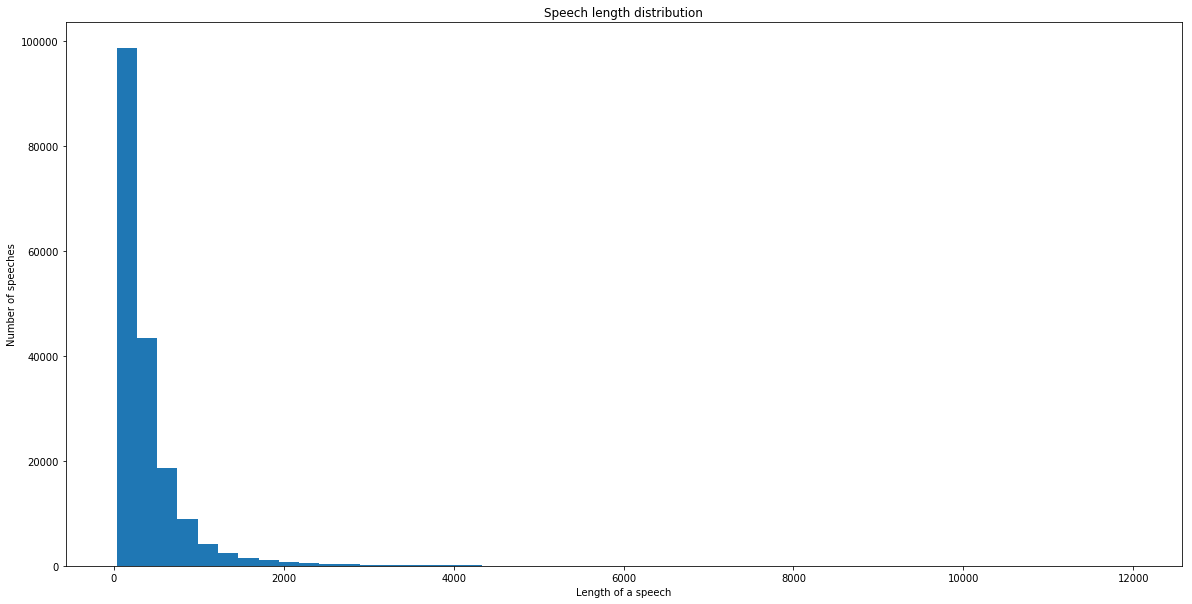

In [40]:
explore_data.plot_sample_length_distribution(train)

### Most popular unigrams (training only)

In [41]:
# take a sample to avoid running out of memory
train_sample = random.sample(train, int(len(train)*0.2))
len(train_sample)

36425

['the', 'to', 'of', 'and', 'in', 'that', 'is', 'for', 'this', 'we', 'it', 'on', 'have', 'are', 'as', 'not', 'be', 'with', 'our', 'from', 'will', 'mr', 'by', 'has', 'they', 'was', 'would', 'my', 'an', 'their', 'at', 'who', 'bill', 'but', 'he', 'or', 'all', 'his', 'do', 'which', 'people', 'been', 'there', 'speaker', 'president', 'what', 'you', 'these', 'about', 'so']


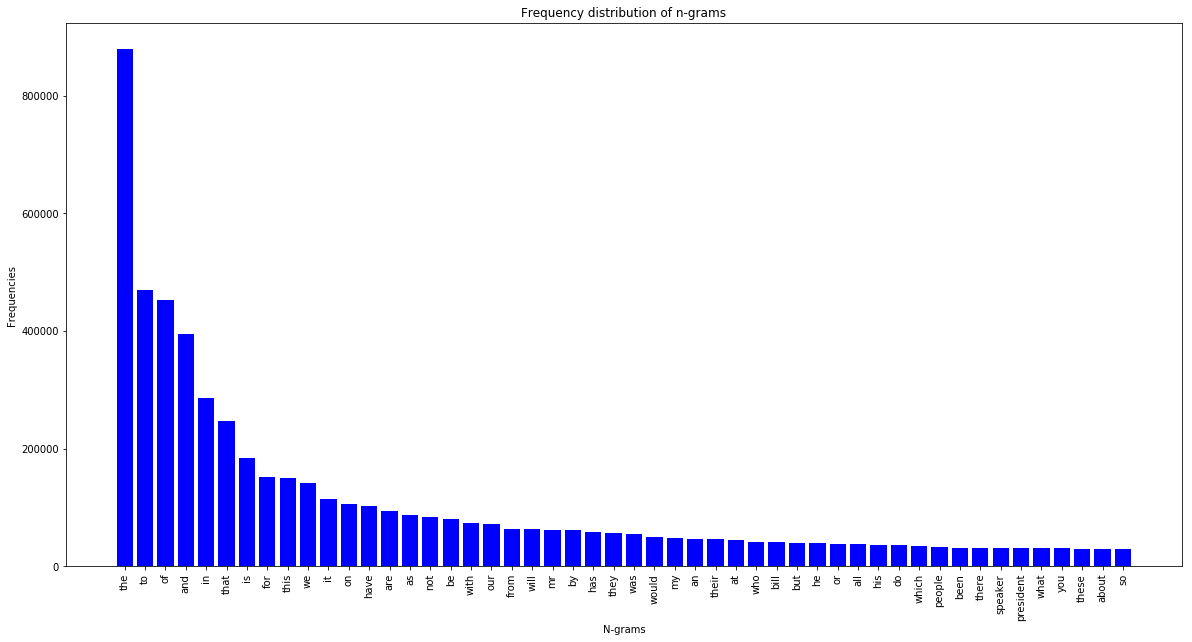

In [42]:
explore_data.plot_frequency_distribution_of_ngrams(train_sample, ngram_range=(1,1))

### Most popular bigrams (training only)

['of the', 'in the', 'to the', 'it is', 'and the', 'on the', 'for the', 'mr speaker', 'that the', 'to be', 'we have', 'we are', 'that is', 'that we', 'by the', 'with the', 'of this', 'united states', 'the united', 'in this', 'at the', 'mr president', 'is the', 'will be', 'from the', 'going to', 'this bill', 'of our', 'want to', 'this is', 'has been', 'my colleagues', 'is not', 'the gentleman', 'have been', 'the senate', 'do not', 'the bill', 'the house', 'there is', 'they are', 'to do', 'one of', 'as the', 'the american', 'mr chairman', 'to make', 'would be', 'gentleman from', 'all of']


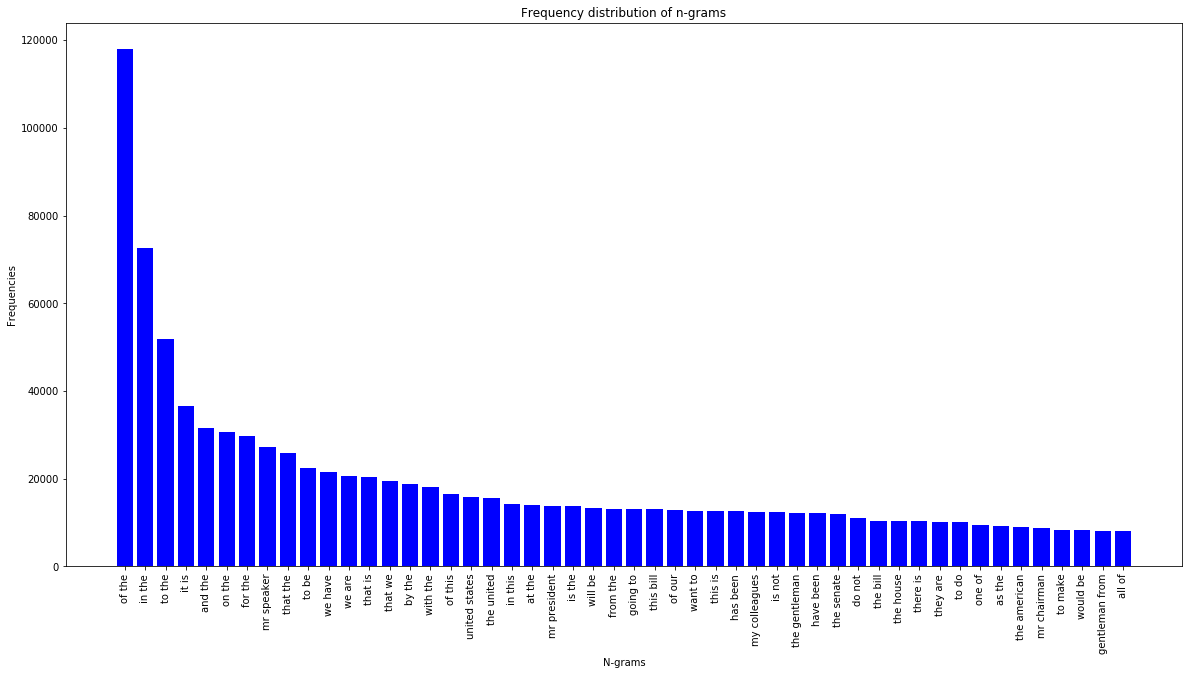

In [43]:
explore_data.plot_frequency_distribution_of_ngrams(train_sample, ngram_range=(2,2))

### Most popular trigrams (training only)

#### Run this only on small samples

['the united states', 'the gentleman from', 'one of the', 'would like to', 'my colleagues to', 'are going to', 'the american people', 'of the united', 'mr speaker rise', 'the department of', 'as well as', 'be able to', 'urge my colleagues', 'member of the', 'the committee on', 'the senator from', 'we need to', 'in the united', 'chairman of the', 'it is not', 'ask unanimous consent', 'that we have', 'the federal government', 'we are going', 'in order to', 'rise today to', 'speaker rise today', 'that we are', 'is going to', 'in support of', 'in this country', 'the fact that', 'the people of', 'members of the', 'unanimous consent that', 'there is no', 'percent of the', 'part of the', 'thank the gentleman', 'of the senate', 'some of the', 'going to be', 'we do not', 'of the house', 'the state of', 'that is the', 'men and women', 'of my time', 'and that is', 'of the committee']


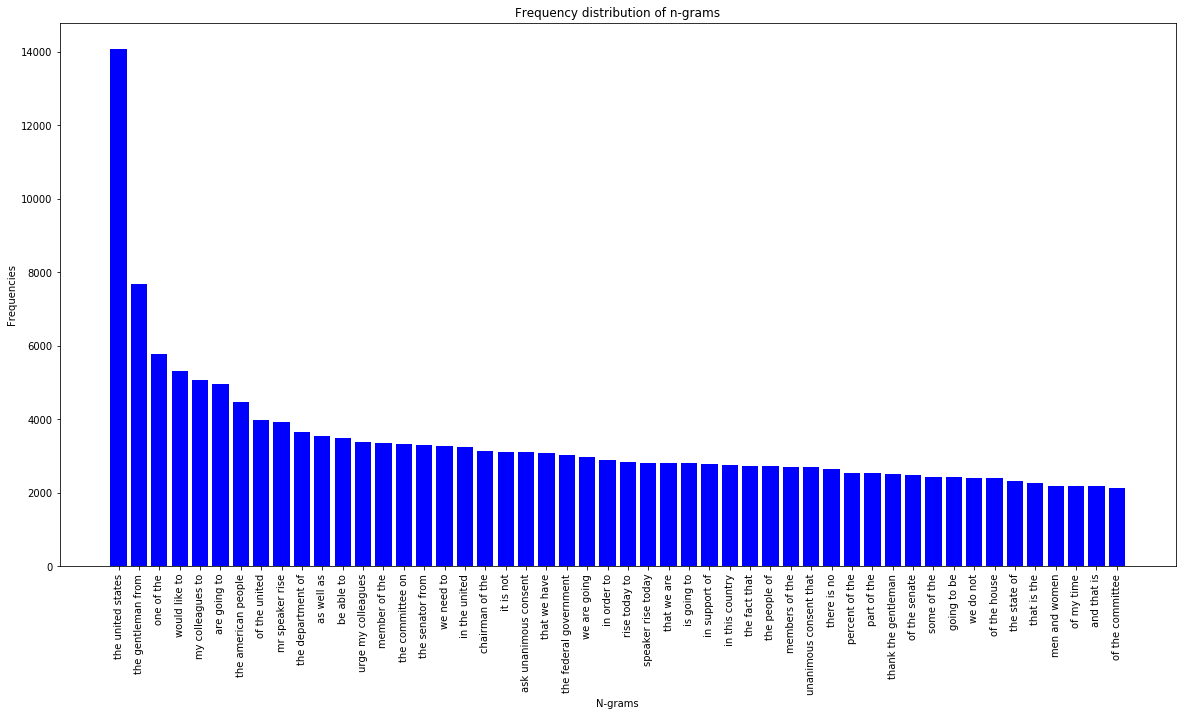

In [44]:
explore_data.plot_frequency_distribution_of_ngrams(train_sample, ngram_range=(3,3))

In [45]:
congress = set([str(i) for i in range(97,115)])

In [46]:
reload(explore_data)
explore_data.ngrams_by_category(train, train_ids, descr, congress, 'Congress', p=0.3, top_n=5)


For Congress 114 top 5 (3, 3) ngrams are:
the united states
mr speaker rise
of my time
the balance of
balance of my
--------------------

For Congress 110 top 5 (3, 3) ngrams are:
the united states
my colleagues to
one of the
the american people
are going to
--------------------

For Congress 100 top 5 (3, 3) ngrams are:
the united states
the gentleman from
would like to
one of the
my colleagues to
--------------------

For Congress 101 top 5 (3, 3) ngrams are:
the united states
the gentleman from
ask unanimous consent
unanimous consent that
would like to
--------------------

For Congress 99 top 5 (3, 3) ngrams are:
the united states
the gentleman from
would like to
one of the
chairman of the
--------------------

For Congress 111 top 5 (3, 3) ngrams are:
the united states
my colleagues to
the american people
one of the
are going to
--------------------

For Congress 109 top 5 (3, 3) ngrams are:
the united states
the gentleman from
one of the
mr speaker rise
my colleagues to
--------

## N-gram model

Inspiration for code: https://developers.google.com/machine-learning/guides/text-classification/step-3

### Pre-processing

In [47]:
# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1, 2)

# Minimum corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 5

# Maximum proportion of corpus containing a word above which a token will be discarded.
# Helps eliminate stop words
MAX_DOCUMENT_FREQUENCY = 0.7

# Limit on the number of features. We use the top 20K features.
TOP_K = 10000

# Output number of top/bottom scoring ngrams
TOP_N = 5

vec_params = {
    'ngram_range': NGRAM_RANGE,
    'min_df': MIN_DOCUMENT_FREQUENCY,
    'max_df': MAX_DOCUMENT_FREQUENCY,
    'top_k': TOP_K,
    'top_n': TOP_N
}

In [48]:
reload(preprocess_data)
train_vec, val_vec, test_vec = preprocess_data.ngram_vectorize(train, train_target, val, test, **vec_params)

Total vocabulary size: 937873
Number of stop words 6495523

Top 5 ngrams by differentiating score:
mr president 	 5028.7
speaker 	 4889.9
senator 	 4770.9
mr speaker 	 3956.9
president 	 3406.7

Bottom 5 ngrams by differentiating score:
able men 	 0.0
husband had 	 0.0
repair in 	 0.0
at global 	 0.0
are extremely 	 0.0


In [49]:
len(train), len(val), len(test)

(182128, 60708, 60712)

In [50]:
train_vec.shape, val_vec.shape, test_vec.shape

((182128, 10000), (60708, 10000), (60712, 10000))

### Saving processed files

In [51]:
pwd

'/Users/fariamardhani/Berkeley/W266/W266-Final-Project/Classification'

In [52]:
outdata_path = '/W266FinalProject/saved_files/Ethnicity'

In [53]:
scipy.sparse.save_npz(os.path.join(outdata_path, 'train_vec.npz'), train_vec)
scipy.sparse.save_npz(os.path.join(outdata_path, 'val_vec.npz'), val_vec)
scipy.sparse.save_npz(os.path.join(outdata_path, 'test_vec.npz'), test_vec)

In [54]:
train_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'train_vec.npz'))
val_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'val_vec.npz'))
test_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'test_vec.npz'))

In [55]:
val_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'val_vec.npz'))

In [56]:
train_vec.shape, val_vec.shape, test_vec.shape

((182128, 10000), (60708, 10000), (60712, 10000))

In [57]:
with open(os.path.join(outdata_path, 'train_list'), 'wb') as fp:
    pickle.dump(train, fp)
with open(os.path.join(outdata_path, 'train_ids'), 'wb') as fp:
    pickle.dump(train_ids, fp)
with open(os.path.join(outdata_path, 'train_target'), 'wb') as fp:
    pickle.dump(train_target, fp)
with open(os.path.join(outdata_path, 'val_list'), 'wb') as fp:
    pickle.dump(val, fp)
with open(os.path.join(outdata_path, 'val_ids'), 'wb') as fp:
    pickle.dump(val_ids, fp)
with open(os.path.join(outdata_path, 'val_target'), 'wb') as fp:
    pickle.dump(val_target, fp)
with open(os.path.join(outdata_path, 'test_list'), 'wb') as fp:
    pickle.dump(test, fp)
with open(os.path.join(outdata_path, 'test_ids'), 'wb') as fp:
    pickle.dump(test_ids, fp)
with open(os.path.join(outdata_path, 'test_target'), 'wb') as fp:
    pickle.dump(test_target, fp)

In [58]:
sum(train_target), sum(val_target), sum(test_target)

(91064, 30354, 30356)

In [59]:
with open(os.path.join(outdata_path, 'train_list'), 'rb') as fp:
    train = pickle.load(fp)
with open(os.path.join(outdata_path, 'train_ids'), 'rb') as fp:
    train_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'train_target'), 'rb') as fp:
    train_target = pickle.load(fp)

In [60]:
with open(os.path.join(outdata_path, 'val_list'), 'rb') as fp:
    val = pickle.load(fp)
with open(os.path.join(outdata_path, 'val_ids'), 'rb') as fp:
    val_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'val_target'), 'rb') as fp:
    val_target = pickle.load(fp)

In [61]:
sum(val_target), len(val_target)

(30354, 60708)

In [62]:
with open(os.path.join(outdata_path, 'test_list'), 'rb') as fp:
    test = pickle.load(fp)
with open(os.path.join(outdata_path, 'test_ids'), 'rb') as fp:
    test_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'test_target'), 'rb') as fp:
    test_target = pickle.load(fp)

In [63]:
sum(train_target), sum(val_target), sum(test_target)

(91064, 30354, 30356)

### Model: Multi-Layer Perceptron (Vanilla NN)

In [64]:
logs_base_dir = "/W266FinalProject/saved_files/Ethnicity"

In [65]:
ngram_model_params = {
    'model': 'ngram',
    'log_dir': logs_base_dir,
    'learning_rate': 1e-3,
    'epochs': 1000,
    'batch_size': 128,
    'layers': 2,
    'units': 64,
    'dropout_rate': 0.2
}

In [44]:
reload(train_model)
history, train_pred_probs, val_pred_probs = train_model.train_model(((train_vec, train_target), (val_vec, val_target)), **ngram_model_params)

Train on 188148 samples, validate on 62716 samples
Epoch 1/1000
 - 47s - loss: 0.5475 - acc: 0.7208 - val_loss: 0.5206 - val_acc: 0.7374
Epoch 2/1000
 - 45s - loss: 0.5094 - acc: 0.7439 - val_loss: 0.5142 - val_acc: 0.7419
Epoch 3/1000
 - 45s - loss: 0.4954 - acc: 0.7528 - val_loss: 0.5113 - val_acc: 0.7433
Epoch 4/1000
 - 45s - loss: 0.4863 - acc: 0.7587 - val_loss: 0.5083 - val_acc: 0.7480
Epoch 5/1000
 - 46s - loss: 0.4752 - acc: 0.7672 - val_loss: 0.5073 - val_acc: 0.7482
Epoch 6/1000
 - 46s - loss: 0.4643 - acc: 0.7748 - val_loss: 0.5051 - val_acc: 0.7502
Epoch 7/1000
 - 46s - loss: 0.4527 - acc: 0.7822 - val_loss: 0.5041 - val_acc: 0.7525
Epoch 8/1000
 - 46s - loss: 0.4398 - acc: 0.7919 - val_loss: 0.5040 - val_acc: 0.7526
Epoch 9/1000
 - 47s - loss: 0.4266 - acc: 0.7997 - val_loss: 0.5050 - val_acc: 0.7541
Epoch 10/1000
 - 46s - loss: 0.4127 - acc: 0.8083 - val_loss: 0.5083 - val_acc: 0.7543
Validation accuracy: 0.7543210664097467, loss: 0.5083065646891768


In [66]:
np.save('/W266FinalProject/saved_files/Ethnicity/val_pred_probs', val_pred_probs, allow_pickle=True, fix_imports=True)

NameError: name 'val_pred_probs' is not defined

## Model evaluation

In [45]:
val_preds = val_pred_probs > 0.5
np.sum(val_preds.flatten()==val_target)

47308

Confusion matrix, without normalization
[[23166  8192]
 [ 7216 24142]]


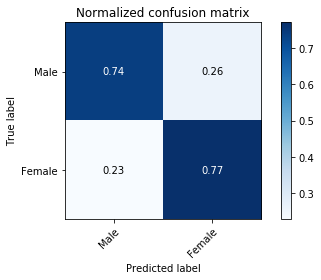

In [46]:
reload(explore_data)
# specify class names in 0 - 1 order
classes = ['White', 'Non-White']
explore_data.plot_confusion_matrix(val_target, val_preds, classes, normalize=True)

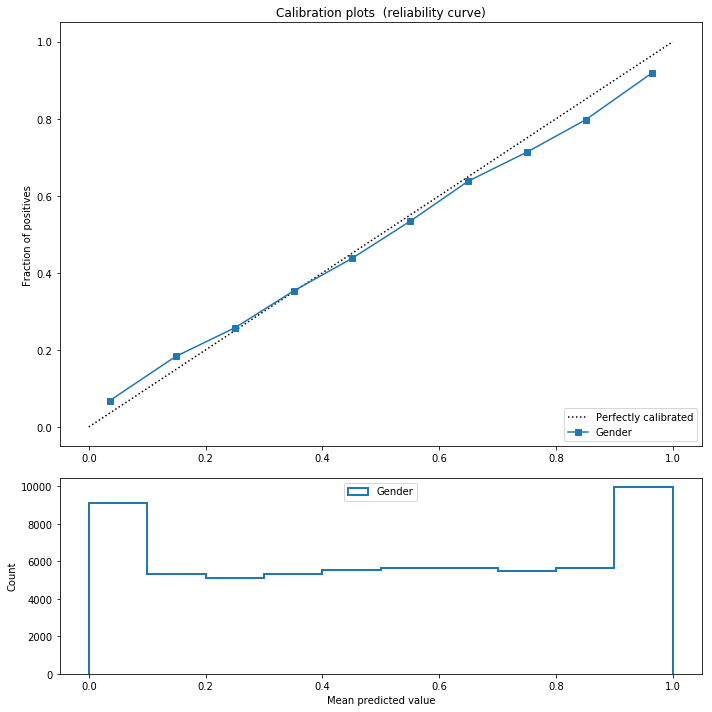

In [47]:
reload(explore_data)
explore_data.plot_calibration_curve(val_target, val_pred_probs, 'Ethnicity')

In [49]:
del train, train_ids, train_pred_probs, train_target, train_vec

In [53]:
with open(os.path.join(outdata_path, 'val_pred_probs'), 'wb') as fp:
    pickle.dump(val_pred_probs, fp)

In [8]:
with open(os.path.join(outdata_path, 'val_pred_probs'), 'rb') as fp:
    val_pred_probs = pickle.load(fp)

In [9]:
val_pred_probs.shape

(62716, 1)

In [10]:
descr_df = pd.read_csv('/W266FinalProject/Data/full_descr.txt', sep="|", index_col=0)
descr_df = descr_df.loc[np.asarray(val_ids, dtype=int)]
descr_df.shape

/home/yulia/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(62716, 16)

In [11]:
descr_df.head()

,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,Age,Age_lt_med,NonWhite,Female,speaker,Full Name,match
speech_id,,,,,,,,,,,,,,,,
1080099024,20031030,436,70,108118820.0,D,108,H,CA,W,66.0,0.0,0.0,1.0,Mrs. CAPPS,"CAPPS, LOIS",fuzzy
1080165561,20040625,6213,1056,108120190.0,D,108,H,CA,B,58.0,0.0,1.0,1.0,Ms. LEE,"LEE, BARBARA",fuzzy
1090156218,20060711,1230,198,109116060.0,D,109,H,CA,H,49.0,1.0,1.0,1.0,Ms. SOLIS,"SOLIS, HILDA",exact
1060121740,20000315,700,136,106117690.0,D,106,H,NY,W,56.0,0.0,0.0,1.0,Mrs. McCARTHY of New York,"MCCARTHY, CAROLYN",exact
1100177577,20080623,3302,490,110114720.0,R,110,H,VA,W,59.0,0.0,0.0,1.0,Mrs. DRAKE,"DRAKE, THELMA",exact


In [56]:
reload(explore_data)
# checking the ratios of demo variables in low-mid-high probability buckets
explore_data.check_bin_probs_distr(val_pred_probs, 
                                   val_ids, 
                                   descr_df)

Validation sample means:
      Gender_F  Ethinicity_NW     AvgAge   Party_D  Chamber_H  AvgWordCount
base       0.5       0.173991  58.285477  0.621468   0.659816     387.29868


,Gender_F,Ethinicity_NW,AvgAge,Party_D,Chamber_H,AvgWordCount
0.4,0.39,0.41,0.99,0.82,0.75,0.94
0.6,0.97,0.83,0.98,0.93,1.11,0.83
1.0,1.58,1.62,1.01,1.19,1.19,1.12


In [10]:
reload(explore_data)
explore_data.compare_ngrams(val, val_pred_probs, ngram_range=(1, 2))


Top 10 ngrams by differentiating score:
sonoma 	 11479.1
sonoma county 	 9561.5
the sonoma 	 4714.7
in sonoma 	 4674.3
of sonoma 	 3948.5
smart security 	 3922.0
century smart 	 3723.2
smart stands 	 3291.8
create smart 	 3056.8
multilateral partnerships 	 2736.7


bin,1,2,3,4
century smart,0.0,0.0,1.0,8.0
create smart,0.0,0.0,0.0,6.0
in sonoma,0.0,0.0,13.0,24.0
multilateral partnerships,0.0,0.0,0.0,7.0
of sonoma,0.0,0.0,10.0,21.0
smart security,0.0,0.0,32.0,48.0
smart stands,0.0,0.0,2.0,8.0
sonoma,0.0,1.0,78.0,113.0
sonoma county,0.0,0.0,36.0,84.0
the sonoma,0.0,0.0,18.0,31.0


#### Run the following test on a random subset of the validation sample

In [11]:
np.random.seed(100)
val_random = np.random.choice(a=[0,1], size=len(val_target), p = [0.9,0.1])
val_random.sum()/val_random.shape[0]

0.10097901651891064

In [12]:
val_sample, val_ids_sample, val_pred_probs_sample = [], [], []
for i in range(len(val_ids)):
    if val_random[i] == 1:
        val_sample.append(val[i])
        val_ids_sample.append(val_ids[i])
        val_pred_probs_sample.append(val_pred_probs[i])
len(val_sample), len(val_ids_sample), len(val_pred_probs_sample)

(6333, 6333, 6333)

In [13]:
reload(explore_data)
explore_data.ngrams_by_bin(val_sample, val_pred_probs_sample)


In 0.4 bin top 10 ngrams:

the united states
the senator from
are going to
the gentleman from
one of the
would like to
we are going
of the united
we are going to
is going to
--------------------

In 0.6 bin top 10 ngrams:

the united states
the gentleman from
would like to
my colleagues to
one of the
mr speaker rise
ask unanimous consent
rise today to
the american people
of the united
--------------------

In 1.0 bin top 10 ngrams:

the united states
my colleagues to
one of the
the american people
mr speaker rise
the gentleman from
would like to
urge my colleagues
be able to
we need to
--------------------


In [12]:
reload(explore_data)
explore_data.print_mispredictions(val_target, val_pred_probs, val, val_ids, descr_df)


True positive (Predicted prob: 1.00):

date                        19950323
char_count                      1963
word_count                       334
speakerid                1.04114e+08
Party                              R
Congress                         104
Chamber                            H
State                             WA
Ethnicity                          W
Age                               55
Age_lt_med                         0
NonWhite                           0
Female                             1
speaker       Ms. DUNN of Washington
Full Name             DUNN, JENNIFER
match                          exact
Name: 1040044513, dtype: object

 Mr. Chairman. on behalf of some of Americas neediest and yet valued citizens. we begin the process of ending welfare as a way of life and restoring welfare assistance to itsoriginal purpose. to provide temporary help to our neighbors in need. Air. Chairman. Americans are a generous people who have long demonstrated our commitment to